In [1]:
# importing the necessary packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action="ignore")

In [2]:
# importting the data set
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
148,53,female,37.430,1,no,northwest,10959.69470
45,55,male,37.300,0,no,southwest,20630.28351
830,63,male,33.100,0,no,southwest,13393.75600
1186,20,male,35.625,3,yes,northwest,37465.34375
1261,28,male,37.100,1,no,southwest,3277.16100
1292,21,male,23.210,0,no,southeast,1515.34490
1324,31,male,25.935,1,no,northwest,4239.89265
379,62,male,31.460,1,no,southeast,27000.98473
57,18,male,31.680,2,yes,southeast,34303.16720
1107,50,female,26.220,2,no,northwest,10493.94580


In [3]:
df.shape

(1338, 7)

In [4]:
# getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features are:
- sex
- smoker
- region

In [5]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no missing values in the dataset

### Data Analysis

In [6]:
# stastistical information about the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


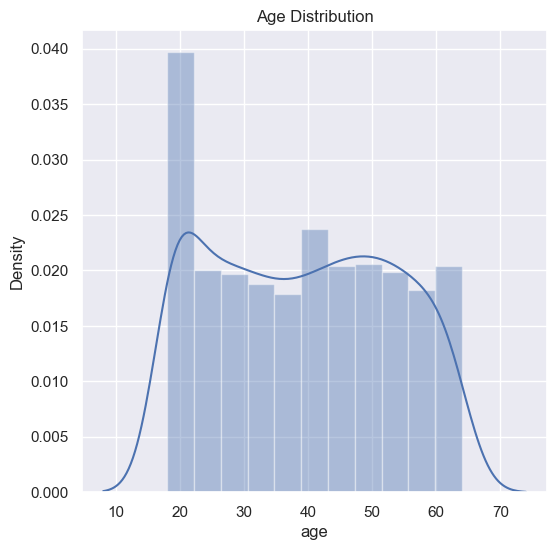

In [9]:
# distribution of age values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df["age"])
plt.title("Age Distribution")
plt.show()

More no. of people in our data set belongs to the 20 of age group

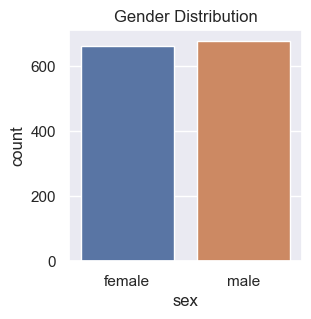

In [11]:
# distribution of gender values
plt.figure(figsize=(3,3))
sns.countplot(x="sex",data=df)
plt.title("Gender Distribution")
plt.show()

distribution is almost equal for both the genders

In [12]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

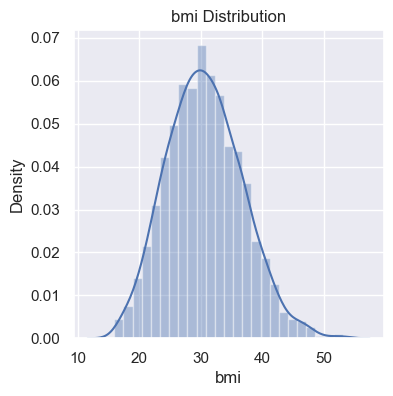

In [16]:
# distribution of bmi values
plt.figure(figsize=(4,4))
sns.distplot(df["bmi"])
plt.title("bmi Distribution")
plt.show()

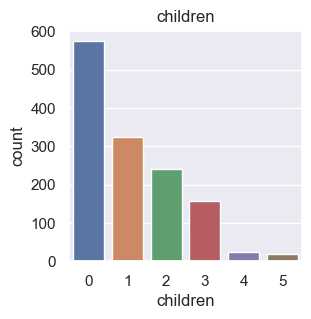

In [17]:
# distribution of children values
plt.figure(figsize=(3,3))
sns.countplot(x="children",data=df)
plt.title("children")
plt.show()

1) most no. of people in the dataset dont have children.
2) No. of people with 1 children is more as compared to no. of people with 2 or 3 childrens.

In [18]:
df["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

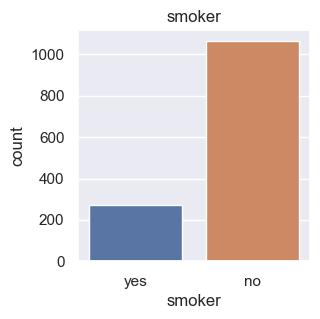

In [19]:
# for smoker column
plt.figure(figsize=(3,3))
sns.countplot(x="smoker",data=df)
plt.title("smoker")
plt.show()

No. of non smokers are very large than the no. of smokers

In [21]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

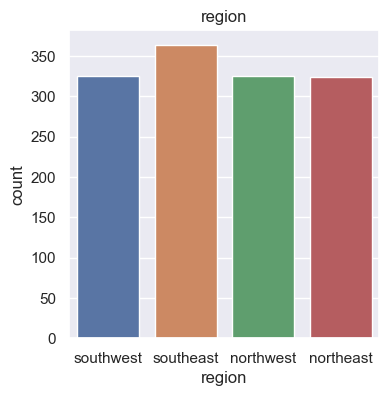

In [24]:
# for region column
plt.figure(figsize=(4,4))
sns.countplot(x="region",data=df)
plt.title("region")
plt.show()

no. of data are almost same for all the columns but for the southeast region no. of data is slightly more

In [25]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

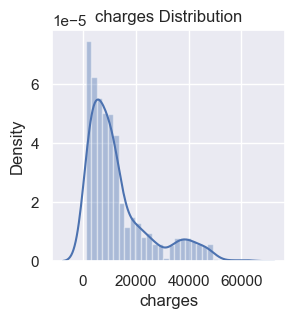

In [26]:
# distribution of charges values
plt.figure(figsize=(3,3))
sns.distplot(df["charges"])
plt.title("charges Distribution")
plt.show()

#### checking for outliers

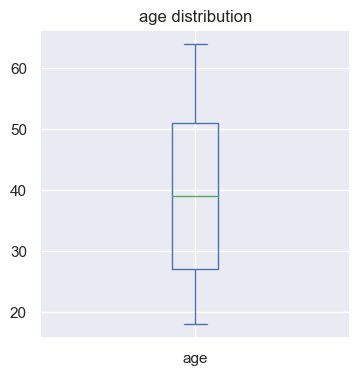

In [37]:
# for age column
plt.figure(figsize=(4,4))
df["age"].plot(kind="box")
plt.title("age distribution")
plt.show()

no outliers present in the age column

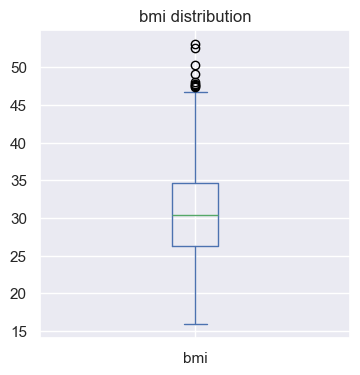

In [38]:
# for bmi column
plt.figure(figsize=(4,4))
df["bmi"].plot(kind="box")
plt.title("bmi distribution")
plt.show()

few outliers are present in the bmi column

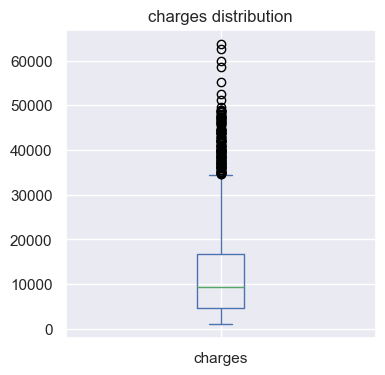

In [39]:
# for charges column
plt.figure(figsize=(4,4))
df["charges"].plot(kind="box")
plt.title("charges distribution")
plt.show()

outliers are present in the charges coulumn

#### correlation matrix

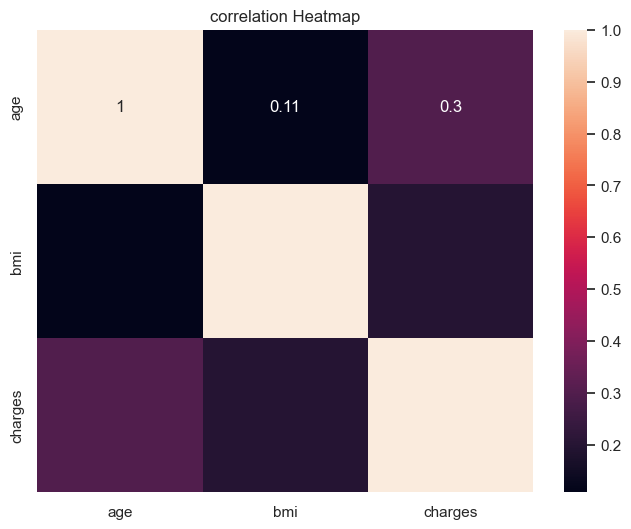

In [41]:
corr = df[["age","bmi","charges"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cbar=True)
plt.title("correlation Heatmap")
plt.show()

there is no corelation among these variables

Text(0, 0.5, 'charges')

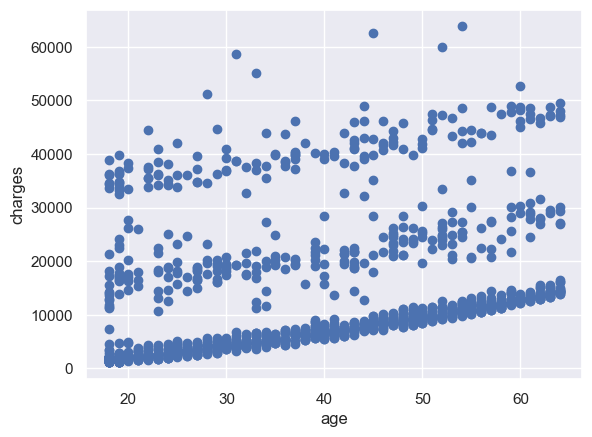

In [43]:
#checking relaition beween age and charges
plt.scatter(data=df,x="age",y="charges")
plt.xlabel("age")
plt.ylabel("charges")

Text(0, 0.5, 'charges')

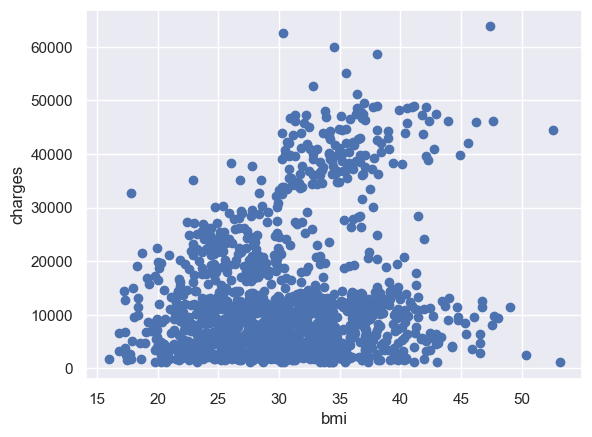

In [44]:
# checking relation between bmi and charges
plt.scatter(data=df,x="bmi",y="charges")
plt.xlabel("bmi")
plt.ylabel("charges")

Text(0, 0.5, 'age')

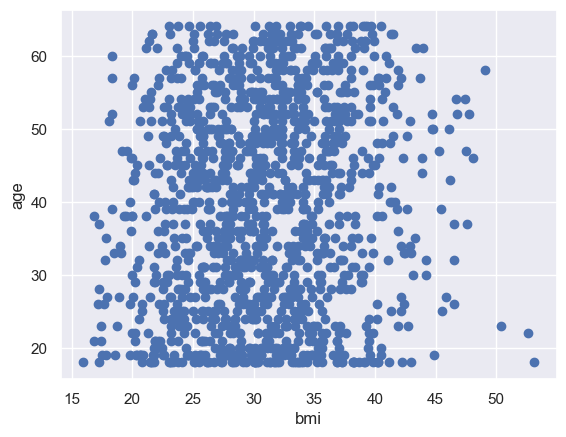

In [45]:
# checking relation between age and bmi
plt.scatter(data=df,x="bmi",y="age")
plt.xlabel("bmi")
plt.ylabel("age")

There is very less relation between the age and BMI

### Data Preprocessing

#### Encoding the categorical columns

In [32]:
# encoding sex column
df.replace({"sex":{"male":0,"female":1}},inplace=True)

# encoding smoker column
df.replace({"smoker":{"yes":0,"no":1}},inplace = True)

# encoding smoker column
df.replace({"region":{"southeast":0,"southwest":1,"northeast":2,"northwest":3}},inplace=True)

In [35]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
371,57,1,22.23,0,1,2,12029.2867
405,52,1,38.38,2,1,2,11396.9002
941,50,1,46.09,1,1,0,9549.5651
1275,57,0,23.70,0,1,1,10959.3300
553,52,1,31.73,2,1,3,11187.6567


### train_test_split

In [47]:
x = df.drop(columns=["charges"],axis=1)
y = df["charges"]

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [54]:
x["age"]=std.fit_transform(np.array(x["age"]).reshape(-1,1))
x["bmi"]=std.fit_transform(np.array(x["bmi"]).reshape(-1,1))
x["children"]=std.fit_transform(np.array(x["children"]).reshape(-1,1))

In [56]:
x.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,1,-0.453320,-0.908614,0,1
1,-1.509965,0,0.509621,-0.078767,1,0
2,-0.797954,0,0.383307,1.580926,1,0
3,-0.441948,0,-1.305531,-0.908614,1,3
4,-0.513149,0,-0.292556,-0.908614,1,3


### Checking various machine learning models

#### 1) LinearRegression

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,cross_validate
lr = LinearRegression()
lr.fit(x_train,y_train)
result = cross_validate(lr,x,y,cv=5,return_train_score = True, scoring="r2")
result

{'fit_time': array([0.01132894, 0.00983024, 0.00791407, 0.01479292, 0.00908828]),
 'score_time': array([0.00999737, 0.00445962, 0.00577259, 0.00511789, 0.00610662]),
 'test_score': array([0.76258026, 0.70682745, 0.77683066, 0.7319328 , 0.75695771]),
 'train_score': array([0.74681   , 0.75942866, 0.7431764 , 0.75502084, 0.74859194])}

In [58]:
train_acc= result["train_score"].mean()*100
print("training accuracy = ",round(train_acc,2),"%")

test_acc= result["test_score"].mean()*100
print("test accuracy = ",round(test_acc,2),"%")

training accuracy =  75.06 %
test accuracy =  74.7 %


#### 2) KNeighborsRegressor

In [59]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
result = cross_validate(kn,x,y,cv=5,return_train_score = True, scoring="r2")
result

{'fit_time': array([0.00726008, 0.00696039, 0.01039958, 0.00860596, 0.00520849]),
 'score_time': array([0.00852442, 0.01129961, 0.00975966, 0.0040195 , 0.01070309]),
 'test_score': array([0.70883073, 0.65968975, 0.64670381, 0.67148645, 0.69505555]),
 'train_score': array([0.7944243 , 0.82604113, 0.81510105, 0.80818661, 0.79828973])}

In [60]:
train_acc= result["train_score"].mean()*100
print("training accuracy = ",round(train_acc,2),"%")

test_acc= result["test_score"].mean()*100
print("test accuracy = ",round(test_acc,2),"%")

training accuracy =  80.84 %
test accuracy =  67.64 %


#### 3) DecisionTreeRegressor()

In [61]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
result = cross_validate(dt,x,y,cv=5,return_train_score = True, scoring="r2")
result


{'fit_time': array([0.01004386, 0.01147103, 0.0167644 , 0.02383375, 0.01773357]),
 'score_time': array([0.00531006, 0.        , 0.00676131, 0.00689435, 0.00611019]),
 'test_score': array([0.7445247 , 0.66290141, 0.71308113, 0.72296092, 0.73335835]),
 'train_score': array([1.        , 1.        , 0.99833215, 0.9983294 , 0.99831954])}

In [62]:
train_acc= result["train_score"].mean()*100
print("training accuracy = ",round(train_acc,2),"%")

test_acc= result["test_score"].mean()*100
print("test accuracy = ",round(test_acc,2),"%")

training accuracy =  99.9 %
test accuracy =  71.54 %


#### 4) RandomForest Regessor

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
result = cross_validate(rf,x,y,cv=5,return_train_score = True, scoring="r2")
result

{'fit_time': array([0.96686363, 1.55392909, 0.96040702, 0.9298265 , 0.94987154]),
 'score_time': array([0.02668118, 0.02525973, 0.03179193, 0.03024101, 0.02991438]),
 'test_score': array([0.85430345, 0.77460345, 0.86908161, 0.82642474, 0.85463922]),
 'train_score': array([0.97682915, 0.98001501, 0.97479645, 0.97632856, 0.97557432])}

In [64]:
train_acc= result["train_score"].mean()*100
print("training accuracy = ",round(train_acc,2),"%")

test_acc= result["test_score"].mean()*100
print("test accuracy = ",round(test_acc,2),"%")

training accuracy =  97.67 %
test accuracy =  83.58 %


##### so here random forest regresorr is the best model so lets consider it as a final model an lets move to hyper parameter tuning

### Random forest Hyperparameter Tuning using RandomSearch.

In [69]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [73]:
param = {
    "n_estimators": [100,200,300],
    "max_depth": [None,5,10],
    "min_samples_split":[2,5,10],
    "bootstrap":[True,False]
}

# Tuning using random search cv
random_search = RandomizedSearchCV(
    param_distributions = param,
    estimator = RandomForestRegressor(),
    cv=5,
    return_train_score=True,
    scoring="r2",
    n_jobs=-1
)

In [74]:
random_search.fit(x,y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, scoring='r2')

In [75]:
random_search.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'max_depth': 5,
 'bootstrap': True}

In [76]:
random_search.cv_results_["mean_train_score"].mean()*100

92.58802696606712

In [77]:
random_search.cv_results_["mean_test_score"].mean()*100

83.05767667836965

In [80]:
rf = RandomForestRegressor(n_estimators = 300,min_samples_split= 5,max_depth= 5,bootstrap=True)

In [81]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_split=5, n_estimators=300)

In [82]:
## savig the model using .pkl
import joblib
joblib.dump(rf,'Medical insuarance cost.pkl')

['Medical insuarance cost.pkl']

### predicting the save model

In [83]:
# lets load the saved modle and get the predictions
model = joblib.load("Medical insuarance cost.pkl")

#predictions
prediction = model.predict(x_test)
prediction

array([10083.56119852,  5875.02461234, 27021.79606475, 10318.26027901,
       34841.62495391,  6331.5979309 ,  2389.11657806, 14265.42879678,
        6372.20673588, 11392.67721181, 19712.7479009 ,  7203.77552812,
        5273.30529057, 44392.43167142, 47084.24983689, 44186.66280402,
       10730.43063562, 43686.80398437, 10000.27754876, 24994.24263256,
        6755.69010637,  9188.76731191,  2404.78658664,  3121.27402387,
       11860.32072905, 12557.92426627, 13900.27413353,  6673.22432719,
       11395.98248686,  2681.93107812,  7518.3150255 , 12601.23792233,
        3048.4157554 ,  6936.30465672,  5081.70742738, 10287.88098768,
        3804.76339228,  8870.37861734, 24470.82225364, 41505.89685646,
        5054.03347949,  4694.85486383, 13223.94052645, 13994.61363613,
        6444.46105783, 15789.96166328,  7157.26954035,  6055.52009289,
       42705.18876264,  5942.39250541, 14189.41168354,  3513.01908289,
        7959.62729393,  2409.93667143, 12420.85492543, 11285.85901295,
      

In [86]:
a = np.array(y_test)
df=pd.DataFrame()
df["predicted"] = prediction
df["original"] = a
df.sample(30)

,predicted,original
192,2771.352895,2731.91220
232,5958.937464,4529.47700
159,41393.339509,39125.33225
248,12017.617818,12592.53450
166,47062.428783,48824.45000
326,16535.131498,13919.82290
296,10612.976320,9304.70190
227,2564.187275,1639.56310
103,14536.650360,12363.54700
185,4805.024814,2855.43755
